# Final Project - Machine Learning for Business Intelligence

This was the final project that we worked with two mates in the Machine Learning in an undergraduate course at the University of Concepción, for Industrial Engineers.

## Import libraries

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
from numpy import array
from astropy.io import fits
from skimage.transform import resize

In [1]:
# By limitations
Largo = 80
Alto = 80

## Matrix generator

In [4]:
# Genera matriz de imagenes
def imgmatrix_generator(i,img_matrix,image):    
    
    image_file = Image.open(image)
    image_resize = image_file.convert('L')
    image_resize = image_resize.resize((Largo,Alto), Image.NEAREST)
    image_array = np.array(image_resize)
    img_matrix[i] = image_array
    
    return img_matrix

## Preprocessing

In [5]:
# Ingresar Datos
# Training Set
X_tra_nor = glob.glob("./data/train/normal/*.jpeg")
X_tra_neu = glob.glob("./data/train/pneumonia/*.jpeg")
X_tra = X_tra_nor + X_tra_neu
# Validation Set
X_val_nor = glob.glob("./data/val/normal/*.jpeg")
X_val_neu = glob.glob("./data/val/pneumonia/*.jpeg")
X_val = X_val_nor + X_val_neu
# Testing Set
X_test_nor = glob.glob("./data/test/normal/*.jpeg")
X_test_neu = glob.glob("./data/test/pneumonia/*.jpeg")
X_test = X_test_nor + X_test_neu

In [7]:
# Columna con 1 para personas normales
X_tra_normal=(X_tra_nor[0],1)
for i in range(len(X_tra_nor)-1):
    i=i+1
    xg_tra=(X_tra_nor[i],1)
    X_tra_normal=np.vstack((X_tra_normal,xg_tra))
# Columna con 1 para personas normales
X_val_normal=(X_val_nor[0],1)
for i in range(len(X_val_nor)-1):
    i=i+1
    xg_val=(X_val_nor[i],1)
    X_val_normal=np.vstack((X_val_normal,xg_val))
# Columna con 1 para personas normales
X_test_normal=(X_test_nor[0],1)
for i in range(len(X_test_nor)-1):
    i=i+1
    xg_test=(X_test_nor[i],1)
    X_test_normal=np.vstack((X_test_normal,xg_test))

In [8]:
# Columna con 0 para personas con pneumonia
X_tra_pneumonia=(X_tra_neu[0],0)
for i in range(len(X_tra_neu)-1):
    i=i+1
    xb_tra=(X_tra_neu[i],0)
    X_tra_pneumonia=np.vstack((X_tra_pneumonia,xb_tra))
# Columna con 0 para personas con pneumonia
X_val_pneumonia=(X_val_neu[0],0)
for i in range(len(X_val_neu)-1):
    i=i+1
    xb_val=(X_val_neu[i],0)
    X_val_pneumonia=np.vstack((X_val_pneumonia,xb_val))
# Columna con 0 para personas con pneumonia
X_test_pneumonia=(X_test_neu[0],0)
for i in range(len(X_test_neu)-1):
    i=i+1
    xb_test=(X_test_neu[i],0)
    X_test_pneumonia=np.vstack((X_test_pneumonia,xb_test))

In [9]:
xx_tra=np.vstack((X_tra_normal,X_tra_pneumonia))
xx_val=np.vstack((X_val_normal,X_val_pneumonia))
xx_test=np.vstack((X_test_normal,X_test_pneumonia))

from numpy.random import shuffle
shuffle(xx_tra)
shuffle(xx_val)
shuffle(xx_test)

In [10]:
# Obtengo valores de X y de Y
y_tra=xx_tra[:,1]
X_tra=xx_tra[:,0]
y_val=xx_val[:,1]
X_val=xx_val[:,0]
y_test=xx_test[:,1]
X_test=xx_test[:,0]

In [11]:
from keras.utils.np_utils import to_categorical
Y_tra = to_categorical(y_tra, num_classes=None)
Y_val = to_categorical(y_val, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
# Matriz de Imagenes: Número de Matrices, Filas, Columnas
Images_Matrix_Tra = np.zeros((len(X_tra),Alto,Largo))
Images_Matrix_Val = np.zeros((len(X_val),Alto,Largo))
Images_Matrix_Test = np.zeros((len(X_test),Alto,Largo))

In [13]:
# Agrego de Matrices a la Matriz Principal
for i in range(len(X_tra)):
    Images_Matrix_Tra = imgmatrix_generator(i,Images_Matrix_Tra,X_tra[i])
Images_Matrix_Tra = Images_Matrix_Tra.reshape(len(X_tra),1,80,80)

In [14]:
for i in range(len(X_val)):
    Images_Matrix_Val = imgmatrix_generator(i,Images_Matrix_Val,X_val[i])
Images_Matrix_Val = Images_Matrix_Val.reshape(len(X_val),1,80,80)

In [15]:
for i in range(len(X_test)):
    Images_Matrix_Test = imgmatrix_generator(i,Images_Matrix_Test,X_test[i])
Images_Matrix_Test = Images_Matrix_Test.reshape(len(X_test),1,80,80)

In [16]:
print(Images_Matrix_Tra.shape)
print(Images_Matrix_Val.shape)
print(Images_Matrix_Test.shape)

(5216, 1, 80, 80)
(16, 1, 80, 80)
(624, 1, 80, 80)


# Proporción en los datos

In [17]:
print(Images_Matrix_Tra.shape)
print(Y_tra.shape)
print(Images_Matrix_Val.shape)
print(Y_val.shape)
print(Images_Matrix_Test.shape)
print(Y_test.shape)

(5216, 1, 80, 80)
(5216, 2)
(16, 1, 80, 80)
(16, 2)
(624, 1, 80, 80)
(624, 2)


In [18]:
Test = pd.DataFrame(Y_test)
Train = pd.DataFrame(Y_tra)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207694C3048>]],
      dtype=object)

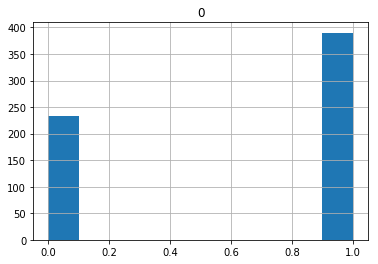

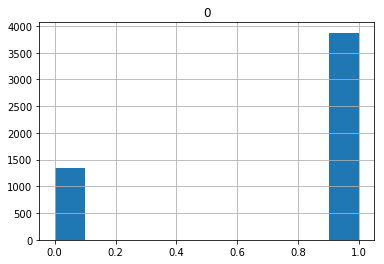

In [19]:
Test.hist(0)
Train.hist(0)

# CNN

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K
from keras.layers.normalization import BatchNormalization
K.set_image_dim_ordering('th')

In [21]:
# F1-Score (descontinuado en Keras 2.0)
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
def createModel(images_size=80):
    model = Sequential()
    
    model.add(Conv2D(32, (7, 7), activation='relu', input_shape=(1,images_size,images_size)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (6, 6), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (4, 4), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    return model

In [23]:
model1 = createModel()
batch_size = 32
epochs = 100
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1])

model1.summary()

history = model1.fit(Images_Matrix_Tra, Y_tra, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Images_Matrix_Val, Y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 74, 74)        1600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 74, 74)        296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 37, 37)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 37, 37)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 32, 32)        73792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 16, 16)        0         
__________

5216/5216 [==============================] - 549s 105ms/step - loss: 0.0128 - acc: 0.9952 - f1: 0.9952 - val_loss: 0.1242 - val_acc: 0.9375 - val_f1: 0.9375
Epoch 80/100
5216/5216 [==============================] - 552s 106ms/step - loss: 0.0192 - acc: 0.9939 - f1: 0.9939 - val_loss: 0.5735 - val_acc: 0.8750 - val_f1: 0.8750
Epoch 81/100
5216/5216 [==============================] - 548s 105ms/step - loss: 0.0175 - acc: 0.9935 - f1: 0.9935 - val_loss: 0.1510 - val_acc: 0.9375 - val_f1: 0.9375
Epoch 82/100
5216/5216 [==============================] - 550s 105ms/step - loss: 0.0260 - acc: 0.9904 - f1: 0.9904 - val_loss: 0.4345 - val_acc: 0.8750 - val_f1: 0.8750
Epoch 83/100
5216/5216 [==============================] - 551s 106ms/step - loss: 0.0137 - acc: 0.9937 - f1: 0.9937 - val_loss: 0.5081 - val_acc: 0.9375 - val_f1: 0.9375
Epoch 84/100
5216/5216 [==============================] - 549s 105ms/step - loss: 0.0182 - acc: 0.9944 - f1: 0.9944 - val_loss: 0.3004 - val_acc: 0.8750 - val_f1: 

# Ploteo

624/624 [==============================] - 30s 48ms/step
Test loss: 2.7408585288585763
Test accuracy: 0.7435897435897436
Test f1_score: 0.7435896839850988
dict_keys(['val_loss', 'val_acc', 'val_f1', 'loss', 'acc', 'f1'])


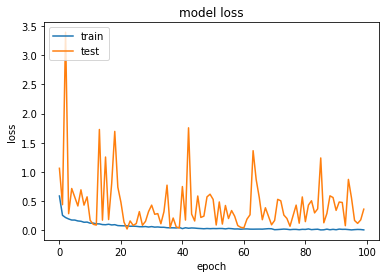

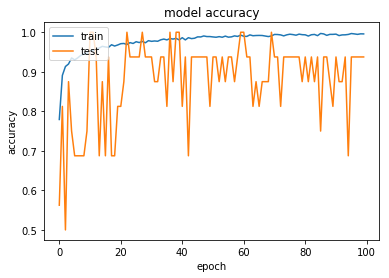

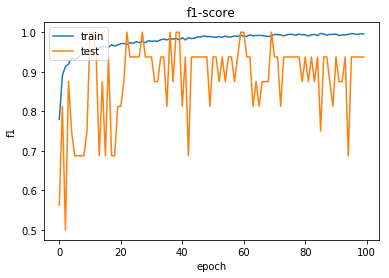

In [24]:
score = model1.evaluate(Images_Matrix_Test, Y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test f1_score:', score[2])

# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for f1
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('f1-score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test f1_score: 0.7435896839850988


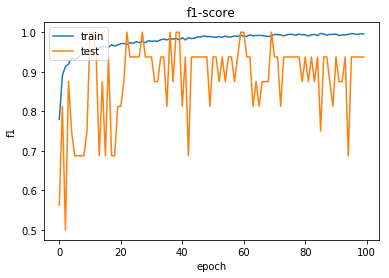

In [25]:
print('Test f1_score:', score[2])
# summarize history for f1
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('f1-score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()